# Jupyter-RDFify Example Notebook

The purpose of this notebook is to introduce you to the [Jupyter-RDFfify](https://github.com/SemWebNotebooks/Jupyter-RDFify) extension and show you many of its awesome features.

## Installation

<div class="alert alert-success" role="alert">
    If you've already installed Jupyter-RDFify and its dependencies in your environment, you can skip this step!
</div>

Install the extension by running the following cell.

In [1]:
!python -m pip install --no-input jupyter-rdfify

/usr/bin/python: No module named pip


The extension requires Graphviz for graph visualization. If you've already installed Graphviz and added it to your path, you're good to go! If not, either install it and add it to your path or either add "--display table", "--display raw" or "--display none" to all cell with graphic output.

If you've the conda package manager installed, you may also run the following cell to install the graphviz binaries.

In [2]:
!conda install --yes -c conda-forge graphviz

zsh:1: command not found: conda


## Loading The Extension

Run the following cell to load the extension. You need to do this for every session or IPython will not recognize the rdf magic commands.

In [3]:
%reload_ext jupyter-rdfify

## It's A Kind Of Magic

Magic commands are the way to tell IPython (the Python shell that Jupyter uses) that the following line or cell is not actual python code and should thus be treated differently. Everything in Jupyter-RDFify is controlled with the same magic, which is %rdf.

Please be aware that there are line and cell magics. Line magics, which only interpret the line, start with one percent sign (e.g. `%rdf`) and cell magics, which interpret both the line and the cell, start with two percent signs (e.g. `%%rdf`). The Jupyter-RDFify uses both but in some use-cases you need to use cell magics (e.g. for parsing turtle).

The rdf magic is interpreted like a command line interface so you can pass additional parameters using hyphens. If at any time you are lost or want to know which parameters you can use, use the help flag (`--help`, `-h`).

To see all modules:

In [4]:
%rdf --help

usage: %rdf [-h] [--verbose] [--return-store]
            {turtle,n3,json-ld,xml,sparql,shex,graph} ...

positional arguments:
  {turtle,n3,json-ld,xml,sparql,shex,graph}
                        RDF modules
    turtle              Turtle module
    n3                  Notation 3 module
    json-ld             JSON-LD module
    xml                 XML+RDF module
    sparql              SPARQL module
    shex                ShEx module
    graph               Graph management module

optional arguments:
  -h, --help            show this help message and exit
  --verbose, -v         Enable verbose output
  --return-store, -r    Returns a copy of all present elements (graphs,
                        schemas, etc.)



To see the parameters of a specific module (here we show it for the turtle module):

In [5]:
%rdf turtle --help

usage: %rdf turtle [-h] [--serialize {turtle,json-ld,xml,n3}]
                   [--display {graph,table,raw,none}] [--label LABEL]
                   [--prefix] [--entail {rdfs,owl,rdfs+owl}]

optional arguments:
  -h, --help            show this help message and exit
  --serialize {turtle,json-ld,xml,n3}, -s {turtle,json-ld,xml,n3}
                        Format for serializing when display is set to raw.
  --display {graph,table,raw,none}, -d {graph,table,raw,none}
                        How output is displayed
  --label LABEL, -l LABEL
                        Store graph locally with this label
  --prefix, -p          Define a prefix which gets prepend to every query.
                        Useful for PREFIX declarations
  --entail {rdfs,owl,rdfs+owl}, -e {rdfs,owl,rdfs+owl}
                        Uses a brute force implementation of the finite
                        version of RDFS semantics or OWL 2 RL. Uses owlrl
                        python package.



## Features And Examples

In the following we will present you many features that Jupyter-RDFify offers.

### Serialization

Jupyter-RDFify can parse many different RDF graph serializations (currently turtle, n3, json-ld and xml). After you have parsed a graph, you can later visualize, query, convert or entail it. The following cell parses a graph in Turtle notation and visualize it as a graph (this will throw an error if you do not have graphviz installed as explained in the [installation section](#Installation)).

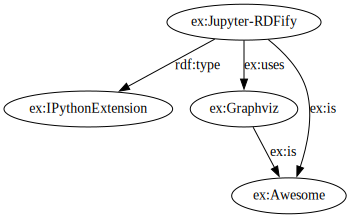

In [9]:
%%rdf turtle
@prefix ex: <http://example.org/> .
ex:Jupyter-RDFify a ex:IPythonExtension .
ex:Jupyter-RDFify ex:is ex:Awesome .
ex:Jupyter-RDFify ex:uses ex:Graphviz .
ex:Graphviz ex:is ex:Awesome .

### Conversion

You can easily convert a serialization into a different format using the `--serialize <format>` parameter together with the `--display raw` parameter. The following cell converts our example graph into JSON-LD.

In [10]:
%%rdf turtle --serialize json-ld --display raw
@prefix ex: <http://example.org/> .
ex:Jupyter-RDFify a ex:IPythonExtension .
ex:Jupyter-RDFify ex:is ex:Awesome .
ex:Jupyter-RDFify ex:uses ex:Graphviz .
ex:Graphviz ex:is ex:Awesome .

[
  {
    "@id": "http://example.org/Jupyter-RDFify",
    "@type": [
      "http://example.org/IPythonExtension"
    ],
    "http://example.org/is": [
      {
        "@id": "http://example.org/Awesome"
      }
    ],
    "http://example.org/uses": [
      {
        "@id": "http://example.org/Graphviz"
      }
    ]
  },
  {
    "@id": "http://example.org/Graphviz",
    "http://example.org/is": [
      {
        "@id": "http://example.org/Awesome"
      }
    ]
  }
]

### Querying

There are two possibilities to query graphs. Either we define and query a graph locally, or we use an external endpoint.

#### Local

To be able to reference a local graph for querying, we need to assign it a label. We can do this using the `--label <label>` parameter. Lets redefine our example graph and assign it the label `awesome_graph`

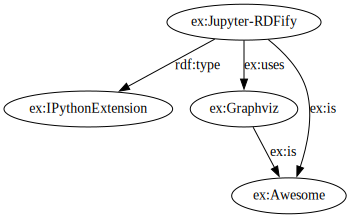

In [11]:
%%rdf turtle --label awesome_graph

@prefix ex: <http://example.org/> .

ex:Jupyter-RDFify a ex:IPythonExtension .
ex:Jupyter-RDFify ex:is ex:Awesome .
ex:Jupyter-RDFify ex:uses ex:Graphviz .
ex:Graphviz ex:is ex:Awesome .

Now we can query the local graph using the SPARQL module and referencing it using `--local <label>`.

In [12]:
%%rdf sparql --local awesome_graph

PREFIX ex: <http://example.org/>

SELECT ?result WHERE {
    ?result ex:is ex:Awesome .
}

?result
http://example.org/Jupyter-RDFify
http://example.org/Graphviz


#### External Endpoint

It is also possible to query an external endpoint. As endpoints shouldn't be put under unnecessary load and as this functionality is not guaranteed to work flawlessly, we recommend using local queries instead whenever possible. You can pass an endpoint using the `--endpoint <endpoint>` parameter. The following cell will query [Wikidata](https://www.wikidata.org/) for nodes of type cat and obtain their labels.

In [13]:
%%rdf sparql --endpoint "https://query.wikidata.org/sparql"
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX bd: <http://www.bigdata.com/rdf#>
PREFIX wikibase: <http://wikiba.se/ontology#>

# Cats
SELECT ?item ?itemLabel 
WHERE 
{
  ?item wdt:P31 wd:Q146.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
} LIMIT 10

item,itemLabel
<http://www.wikidata.org/entity/Q378619>,CC@en
<http://www.wikidata.org/entity/Q498787>,Muezza@en
<http://www.wikidata.org/entity/Q677525>,Orangey@en
<http://www.wikidata.org/entity/Q851190>,Mrs. Chippy@en
<http://www.wikidata.org/entity/Q893453>,Unsinkable Sam@en
<http://www.wikidata.org/entity/Q1050083>,Catmando@en
<http://www.wikidata.org/entity/Q1201902>,Tama@en
<http://www.wikidata.org/entity/Q1207136>,Dewey Readmore Books@en
<http://www.wikidata.org/entity/Q1371145>,Socks@en
<http://www.wikidata.org/entity/Q1386318>,F. D. C. Willard@en


### Validation

Jupyter-RDFify allows you to define graph schemas and validate your graphs with them. Currently it only supports ShEx but support for SHACL is planned.

We first define our graph and our schema and assign labels `awesome_graph1` and `awesome_schema` accordingly.

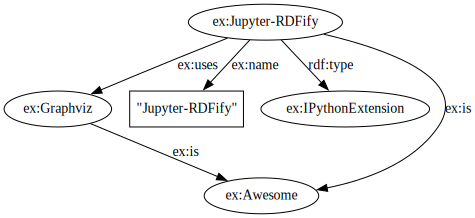

In [14]:
%%rdf turtle --label awesome_graph1

PREFIX ex: <http://example.org/>

ex:Jupyter-RDFify a ex:IPythonExtension .
ex:Jupyter-RDFify ex:is ex:Awesome .
ex:Jupyter-RDFify ex:uses ex:Graphviz .
ex:Jupyter-RDFify ex:name "Jupyter-RDFify" .
ex:Graphviz ex:is ex:Awesome .

In [15]:
%%rdf shex parse --label awesome_schema

PREFIX ex: <http://example.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

ex:AwesomeShape {
    ex:is [ex:Awesome];
    a [ex:IPythonExtension];
    ex:name xsd:string
}

ShEx: Shape successfully parsed.


To validate your graph, use the `validate` action of the ShEx module and give the following parameters:
- `--label, -l <schema label>` Label which you have assigned to the schema
- `--graph, -g <graph label>` Label which you have assigned to the graph
- `--start, -s <starting shape>` URI of shape which is the starting point of the schema
- `--focus, -f <focus node>` URI of node in graph to focus on. Can be omitted to validate all nodes.

In the following we will validate our graph using our schema. The defined shape is our starting shape and we will focus on both `ex:Jupyter-RDFify` and `ex:Graphviz`. The first is expected to pass while the second is expected to be rejected with a reason.

In [ ]:
%rdf shex validate --label awesome_schema --graph awesome_graph1 --start http://example.org/AwesomeShape --focus http://example.org/Jupyter-RDFify
%rdf shex validate --label awesome_schema --graph awesome_graph1 --start http://example.org/AwesomeShape --focus http://example.org/Graphviz

## Other Features

This section will go over other features worth mentioning very quickly.

### Prefixes

You can predefine a prefix for most modules. This is useful for prefix declarations and similar as to not repeat them each cell. Use the `--prefix` flag to define a prefix (or the `prefix` action in case of the ShEx module).

In [ ]:
%%rdf turtle --prefix
# This prefix will be prepend to every use of the turtle module
PREFIX ex: <http://example.org/>

We can now define graphs without declaring the `ex:` prefix.

In [ ]:
%%rdf turtle
ex:Jupyter-RDFify ex:is ex:Awesome .

### Entailment

Jupyter-RDFify has basic RDFS and OWL entailment functionality. This uses [OWL-RL](https://owl-rl.readthedocs.io/en/latest/) to generate a finite closure under a given semantic. As this uses a brute-force approach, it may take a long time or fail for large graphs. To entail a graph using either rdfs, owl or rdfs+owl semantics, use the `--entail <regime>` parameter. Note that this may add some axiomatic triples as well.

In [ ]:
%%rdf turtle --entail rdfs
PREFIX ex: <http://example.org/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

ex:Jupyter-RDFify a ex:IPythonExtension .
ex:IPythonExtension rdfs:subClassOf ex:Extension .

### Graph Manager

You can use the Graph Manager to work with already defined labelled graphs. With it, you can list, remove, draw and entail graphs. Don't forget to specify a graph with the `--label` parameter.

In [ ]:
%rdf graph --help

## Accessing Underlying Data

Sometimes you may want to access the underlying datastructures (RDFLib graphs, PyShEx schemas, etc.). This is useful when working with a framework like [nbgrader](https://nbgrader.readthedocs.io/) to write tests which check whether a student has given a correct solution. With the `--return-store` flag, the magic execution will return all stored data in a python dictionary.

In [56]:
# Obtain all data
data = %rdf --return-store
# Print some information
print("Possible keys:")
for key in data:
    print(f"  {key}")

# Print all graph labels
print("Labelled graphs:")
for graph in data['rdfgraphs']:
    print(f"  {graph}")
    
# Check whether the last graph contains the triple (ex:Jupyter-RDFify, rdf:type, ex:IPythonExtension)
from rdflib import URIRef, RDF
assert(
    (URIRef("http://example.org/Jupyter-RDFify"), RDF.type, URIRef("http://example.org/IPythonExtension"))
    in data['rdfgraphs']['last']
), "Triple not found"
print("Triple was found")

Possible keys:
  rdfgraphs
  rdfsources
  rdfresults
  rdfshapes
Labelled graphs:
  awesome_graph1
  last
Triple was found
